### 3022 Introduction to Data Science - Final Project - Fall 2019  <img src="Images/RedAbalone.jpg" alt="Abalone Seastar Interaction" width="200" style="float:right;"/>
### Predicting the Age of Abalone by Body Measurements
#### Sabine Hollatz


### The Problem
Abalone are marine snails with a single shell that feed on kelp and live on rocks along the coastlines around the world. Their meat is considered to be a delicacy and their shells are used for producing jewelery and other decorative objects. The global population has declined by more than 50% according to the FAO. In California is the harvest of natural populations strongly restricted. Demands are met by farms such as the Monterey Abalone Company that grow abalone in cage cultures underneath the warf. The age can only be determined from the inside of the shell, counting growth rings under the microscope. This is time-consuming and kills the animal. Predicting the age range from body measurments that can be assessed from the outside would improve the research as well as farming evaluations.

### Personal Interest
Even though the data is collected in Tasmania, Australia, from a population of blacklip abalone that do not exist in California, certain characteristics such as the process of growth is the same among species. As the abalone grows it adds new shell to the outer rim causing the shell to increase in diameter and showing the rings that can be counted to determine the age. I am very interested in California's environment.

<a href="https://www.youtube.com/watch?v=TTslY9CaKbM"><img src="Images/abalone_seastar.jpeg" alt="Abalone Seastar Interaction" width="200" style="float:right;"/></a>
In California exist 7 species that are closed for commercial fishery since 1997. Poaching is an issue, since a single animal sells for up to $100. The decrease in kelp forests is a major concern, also because many abalone starve to death and their empty shells are washed ashore. Abalone will be highly effected by climate change.


Interesting facts about these animals are that they have blue-green blood, produce pearls, and that they can twist their shell and run off when they are touched by a predatory sea star. Check out a video to see what that looks like by clicking on  the image (this redirects you to youtube) <br>
I'd say abalones are keepers. Let's help environmental science and research to study and protect these fabulous animals.

### The Data
The dataset is collected by the Sea Fisheries Division in Tasmania 1994 and publicly available at kaggle.com: <br>
https://www.kaggle.com/hurshd0/abalone-uci#abalone_original.csv

8 body charateristics of 4177 abalone are taken, including sex (male, female, infant), length, diameter, height, number of rings, and weights of different body parts. Whole-weight includes all parts, shucked-weight is just the meat without the shell, viscera-weight is the gut weight after bleeding, and shell is the weight of the shell after drying. The units are in millimiters or grams. The age is traditionally determined by the number of rings plus 1.5. The only categorical attribute is 'sex'. All other features are continuous. <br>

<a href="https://www.youtube.com/watch?v=TTslY9CaKbM"><img src="Images/dataCollection.png" alt="Process of Data Collection" width="100" style="float:right;"/></a>


Collecting data about abalone is a difficult and expensive process. By interest to get more insight into the data collection steps, watch this youtube video from the Nothern California coast: 

### Proposed Types of Analysis
The first steps are to clean and preprocess the data for the analysis. This includes adjusting variable names and data types if needed, checking for missing or zero values and filling them in, and detecting outliers and measurment errors and removing them if possible. Missing values in the numerical variables will be replaced by the variable mean and missing data in the categorical variable will be replaced by the mode. Outliers are detected using the interquartile range. Min/Max normalization will be applied to compare distributions from different variables and to perform multilinear regression during the main analysis. Visualization techniques such as boxplots, scatterplots and histograms will help with further error identification and potential imbalances in the data. However, missing values and outliers in the response variable 'number of rings' will be filled in with 'nan' instead of a central measure of tendency. Potential outliers in the response will not be removed since they are the values that need to be predicted. 

The second step is the exploratory data analysis where statistical calculations and tests will provide insight into the distribution of each predictor and response variable and potential correlations. Correlations between body measurements and age are expected and will be determind by calculating the correlation coefficients pairwise.

The third step is the main regression analysis. Single linear regression, multilinear regression and polynomial regression will be performed, evaluated and compared. Fluctuations in length and other body measurements related to age are expected. Californian red abalone do not grow continously. They take 12 years on average to reach a length of 7 inches, 5 more years to grow from 7 to 8 inches, and another 13 years to grow from 8 to 9 insches. This will be kept in mind, when analysing the Australian blacklip abalone data set.

According to a study by the Department of Biology, California Fish and Game, the populations of red abalone in California have usually more female than male individuen. 
Furthermore, female red abalone in California mature at a smaller size than males. If this difference is also true for the Tasmanian abalone, different classifiers will be trained to predict the sex based on physical characteristics.

Difficulties are anticipated in the limitations of the dataset due to the small number of attributes. 

### Data Cleaning and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df_abalone = pd.read_csv('abalone_original.csv')
df_abalone.head()                       

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


#### Check Datatypes
To ensure that future calculations run smoothly, the datatypes are checked and adjusted.

In [3]:
df_abalone.dtypes

sex                object
length              int64
diameter            int64
height              int64
whole-weight      float64
shucked-weight    float64
viscera-weight    float64
shell-weight      float64
rings               int64
dtype: object

In [4]:
# change length, diameter, height to float64 
# change object to category
df_abalone['sex'] = df_abalone['sex'].astype('category')
df_abalone[['length', 'diameter', 'height']] = df_abalone[['length', 'diameter', 'height']].astype('float64')
df_abalone.dtypes

sex               category
length             float64
diameter           float64
height             float64
whole-weight       float64
shucked-weight     float64
viscera-weight     float64
shell-weight       float64
rings                int64
dtype: object

#### Check for Missing and Zero Values

In [5]:
# missing values
df_abalone.isnull().count()

sex               4177
length            4177
diameter          4177
height            4177
whole-weight      4177
shucked-weight    4177
viscera-weight    4177
shell-weight      4177
rings             4177
dtype: int64

There are no missing values in the dataset.

In [6]:
# zero values
for feature in df_abalone.columns:
    counter = 0
    for item in df_abalone[feature].values:
        if 0 == item:
           counter = counter + 1
    print(feature, counter)


sex 0
length 0
diameter 0
height 2
whole-weight 0
shucked-weight 0
viscera-weight 0
shell-weight 0
rings 0


There are only 2 data points that have a value of zero, so that they are removed from the data set instead of replacing them with a measure of central tendency.

In [7]:
# drop data points with height 0
zero_indices = df_abalone[df_abalone.height == 0].index
df_abalone = df_abalone.drop(zero_indices)
df_abalone.count()

sex               4175
length            4175
diameter          4175
height            4175
whole-weight      4175
shucked-weight    4175
viscera-weight    4175
shell-weight      4175
rings             4175
dtype: int64

#### Rename Variables

In [8]:
# Some Python libraries have difficulty reading a variable name with a hyphen, so they need to be renamed.
old_names = ['whole-weight', 'shucked-weight', 'viscera-weight', 'shell-weight']
new_names = ['whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
new_all = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

df_abalone[new_names] = df_abalone[old_names]
df_abalone = df_abalone.drop(old_names, axis=1)
df_abalone = df_abalone[new_all]
df_abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15
1,M,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7
2,F,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9
3,M,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10
4,I,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7


#### Visualization of Attribute Distributions 
Box plots will provide a first insight of the variable distributions and can indicate possible outliers. 
Since there exist one categorical variable "sex", that has the 3 different values "M" for male, "F" for female, and "I" for infant, the visualization of the numerical features is separated by sex.

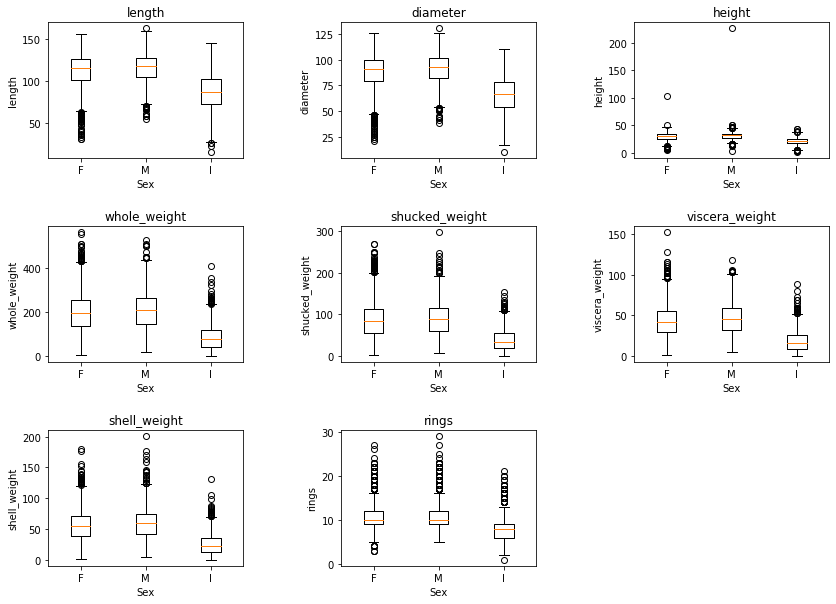

In [9]:
sex = ['M', 'F', 'I']
columns = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(14,10))


for i in range(len(columns)):
    attributes = []
    for j in range(len(sex)):
        attributes.append(df_abalone.loc[df_abalone.sex==sex[j], columns[i]].values)
    if i < 3:
        ax[0,i].boxplot([attributes[0], attributes[1], attributes[2]], labels=['F', 'M', 'I'])
        ax[0,i].set_title(columns[i])
        ax[0,i].set_xlabel('Sex')
        ax[0,i].set_ylabel(columns[i])
    elif i < 6:
        ax[1,i-3].boxplot([attributes[0], attributes[1], attributes[2]], labels=['F', 'M', 'I'])
        ax[1,i-3].set_title(columns[i])
        ax[1,i-3].set_xlabel('Sex')
        ax[1,i-3].set_ylabel(columns[i])
    else:
        ax[2,i-6].boxplot([attributes[0], attributes[1], attributes[2]], labels=['F', 'M', 'I'])
        ax[2,i-6].set_title(columns[i])
        ax[2,i-6].set_xlabel('Sex')
        ax[2,i-6].set_ylabel(columns[i])

#     print(attributes[0])
ax[2,2].remove()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

The features appear to be normally distributed, where some attributes are less skewed than others. 
The attribute, that is most skewed seems to be the number of rings. The distribution for both females and males are right skewed, but infants are left skewed. Most features show outliers only to one side except 'height'. The next step is to identify outliers.

#### Outliers Detection

In [10]:
def outlierCheck(df, attr):
    outlier_indices = []
    outlier_values = []
    inlier_indices = []
    q1 = df[attr].quantile(.25)
    q3 = df[attr].quantile(.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    for index, row in df.iterrows():
        if row[attr] > upper_bound:
            outlier_indices.append(index)
            outlier_values.append(row[attr])
        elif row[attr] < lower_bound:
            outlier_indices.append(index)
            outlier_values.append(row[attr])
        else:
            inlier_indices.append(index)
    return inlier_indices, outlier_indices, outlier_values
    
females = df_abalone[df_abalone.sex == "F"]
males = df_abalone[df_abalone.sex == "M"]
infants = df_abalone[df_abalone.sex == "I"]

# count number of outliers per sex
outliers_female = []
outliers_male = []
outliers_infant = []
for feature_f in females.columns:
    if feature_f == 'sex':
        continue
    inlier_f, outlier_f, _ = outlierCheck(females, feature_f)
    if feature_f != 'rings':
        outliers_female = outliers_female + outlier_f
    print("In females feature {} are {} outliers".format(feature_f, len(outlier_f)))
print("")

for feature_m in males.columns:
    if feature_m == 'sex':
        continue
    inlier_m, outlier_m, _ = outlierCheck(males, feature_m)
    if feature_m != 'rings':
        outliers_male = outliers_male + outlier_m
    print("In males feature {} are {} outliers".format(feature_m, len(outlier_m)))
print("")

for feature_i in infants.columns:
    if feature_i == 'sex':
        continue
    inlier_i, outlier_i, _ = outlierCheck(infants, feature_i)
    if feature_i != 'rings':
        outliers_infant = outliers_infant + outlier_i
    print("In infants feature {} are {} outliers".format(feature_i, len(outlier_i)))

outliers = set(outliers_female + outliers_male + outliers_infant)
print("")
print("A total of {} outliers are in all features other than 'sex' and 'rings' detected".format(len(outliers)))

In females feature length are 15 outliers
In females feature diameter are 16 outliers
In females feature height are 23 outliers
In females feature whole_weight are 11 outliers
In females feature shucked_weight are 14 outliers
In females feature viscera_weight are 8 outliers
In females feature shell_weight are 19 outliers
In females feature rings are 92 outliers

In males feature length are 41 outliers
In males feature diameter are 43 outliers
In males feature height are 15 outliers
In males feature whole_weight are 29 outliers
In males feature shucked_weight are 30 outliers
In males feature viscera_weight are 22 outliers
In males feature shell_weight are 25 outliers
In males feature rings are 94 outliers

In infants feature length are 4 outliers
In infants feature diameter are 1 outliers
In infants feature height are 13 outliers
In infants feature whole_weight are 21 outliers
In infants feature shucked_weight are 20 outliers
In infants feature viscera_weight are 20 outliers
In infants 

The feature rings is the target variable for the regression analysis. Therefore, the outliers will not be removed at this point in time. The outliers in the other numeric categories are going to be dropped from the dataset in the next step.

In [11]:
# drop 204 outliers out of 4177 data points
abalone_cleaned = df_abalone.drop(outliers)
abalone_cleaned.count()

sex               3967
length            3967
diameter          3967
height            3967
whole_weight      3967
shucked_weight    3967
viscera_weight    3967
shell_weight      3967
rings             3967
dtype: int64

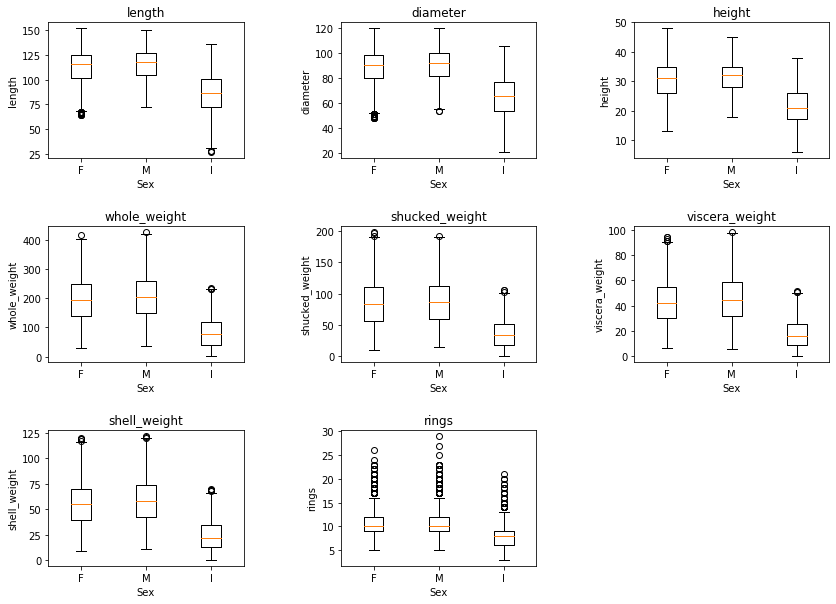

In [12]:
# plot the data again after outliers have been removed.

fig1, ax1 = plt.subplots(nrows=3, ncols=3, figsize=(14,10))


for i in range(len(columns)):
    atts = []
    for j in range(len(sex)):
        atts.append(abalone_cleaned.loc[abalone_cleaned.sex==sex[j], columns[i]].values)
    if i < 3:
        ax1[0,i].boxplot([atts[0], atts[1], atts[2]], labels=['F', 'M', 'I'])
        ax1[0,i].set_title(columns[i])
        ax1[0,i].set_xlabel('Sex')
        ax1[0,i].set_ylabel(columns[i])
    elif i < 6:
        ax1[1,i-3].boxplot([atts[0], atts[1], atts[2]], labels=['F', 'M', 'I'])
        ax1[1,i-3].set_title(columns[i])
        ax1[1,i-3].set_xlabel('Sex')
        ax1[1,i-3].set_ylabel(columns[i])
    else:
        ax1[2,i-6].boxplot([atts[0], atts[1], atts[2]], labels=['F', 'M', 'I'])
        ax1[2,i-6].set_title(columns[i])
        ax1[2,i-6].set_xlabel('Sex')
        ax1[2,i-6].set_ylabel(columns[i])

#     print(attributes[0])
ax1[2,2].remove()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

The boxplots still show outliers. Those are probably due to the fact that the interquartile range, which is used for drawing boxplots, can change when outliers have been removed. Outliers can have an affect on the quartile values. Let's check that theory for the example of the feature viscera_weight.

In [13]:
# dataframe before outlier were removed
df_abalone.groupby('sex').viscera_weight.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,1307.0,46.137720,19.523476,4.2,31.800,44.8,59.45,118.0
I,1340.0,18.412388,12.511693,0.1,8.500,16.1,26.00,88.1
M,1528.0,43.108901,20.983798,0.6,29.175,42.0,55.60,152.0


In [14]:
# dataframe after outlier removal
abalone_cleaned.groupby('sex').viscera_weight.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,1246.0,45.516453,17.931083,5.2,32.125,44.5,58.575,98.4
I,1294.0,17.586476,10.952799,0.1,8.500,15.9,25.200,51.4
M,1427.0,42.569446,18.033096,5.9,30.100,41.9,54.600,94.5


Most quartile values have changed after outliers removal, so that the interquartile range has narrowed
and other values are now considered as outliers. However, this result is misleading and no further data values are
removed from the data set.

#### Checking for Errors and Imbalances in the Data

In [15]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
for feature in abalone_cleaned.columns:
    if feature == 'sex':
        continue
    print("Feature: ", feature)
    print(abalone_cleaned.groupby('sex')[feature].describe())
    print("")

Feature:  length
       count    mean    std    min     25%     50%     75%     max
sex                                                               
F   1246.000 115.726 15.752 72.000 105.000 118.000 127.000 150.000
I   1294.000  84.990 20.522 27.000  72.000  87.000 101.000 136.000
M   1427.000 112.990 17.171 64.000 102.000 116.000 125.000 152.000

Feature:  diameter
       count   mean    std    min    25%    50%     75%     max
sex                                                            
F   1246.000 90.882 12.940 54.000 82.000 92.000 100.000 120.000
I   1294.000 64.821 16.616 21.000 54.000 66.000  77.000 106.000
M   1427.000 88.460 14.123 48.000 80.000 91.000  99.000 120.000

Feature:  height
       count   mean   std    min    25%    50%    75%    max
sex                                                         
F   1246.000 31.365 5.328 18.000 28.000 32.000 35.000 45.000
I   1294.000 21.437 5.886  6.000 17.250 21.000 26.000 38.000
M   1427.000 30.340 5.859 13.000 26.000 31.000

Comparing the different types of weights, there is one anomality that does not make sense. The max whole_weight value for males, which accounts for meat and shell weight, is smaller than the max shucked_weight value, which refers to meat only. Let's plot this.

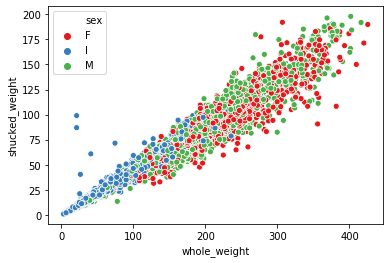

In [16]:
sns.scatterplot(x='whole_weight', y='shucked_weight', data=abalone_cleaned, hue='sex', palette="Set1");

Besides the max value in the male population a few infant shucked_weight values seem to show the same behavior. As a consequence, I iterate over the entire data set, identify the values where the relation between whole_weight and shucked_weight does not make sense and remove those anomalies, because they can cause problems in the further analysis.

In [17]:
# identifying data points with anomaly, where whole_weight is smaller than shucked_weight.
# values need to be removed.

# df_abalone_cleaned = df_abalone_scaled[df_abalone_scaled.whole_weight > df_abalone_scaled.shucked_weight]
indices_weights = []
for index, row in abalone_cleaned.iterrows():
    if row['whole_weight'] < row['shucked_weight']:
        indices_weights.append(index)
print("There are {} data points where whole_weight and shucked_weight do not add up and are being removed.".format(len(indices_weights)))

# remove false measurements:
abalone_cleaned = abalone_cleaned.drop(indices_weights)

There are 4 data points where whole_weight and shucked_weight do not add up and are being removed.


In [18]:
# no more data points are being removed, so that an unnormalized version of the dataset is stored.
abalone_cleaned.to_csv('cleaned_abalone_dataset.csv', index=False)

In [19]:
# checking for imbalances in sexes
df_abalone_cleaned = pd.read_csv('cleaned_abalone_dataset.csv')
df_abalone_cleaned.groupby(['sex']).length.count()
df_abalone_cleaned.head()
nonnoramilzed = df_abalone_cleaned

The number of samples among the sexes are relative evenly spread.

In [20]:
# checking for imbalances in rings
df_abalone_cleaned.groupby('rings').height.count()


rings
3       9
4      46
5      99
6     246
7     373
8     562
9     676
10    613
11    463
12    242
13    190
14    115
15     99
16     58
17     49
18     36
19     32
20     23
21     13
22      6
23      8
24      1
25      1
26      1
27      1
29      1
Name: height, dtype: int64

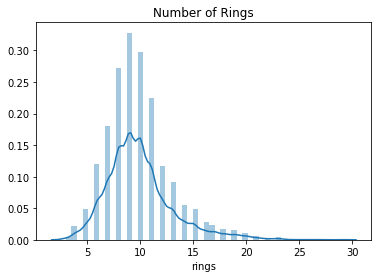

In [21]:
sns.distplot(df_abalone_cleaned.rings).set_title('Number of Rings');


No imbalance is obvious.

#### Normalizing the Data

The previous boxplots have provided a first insight in each distribution and potential outliers. However, to compare values and distributions of different features and to perform multilinear regression, the data needs to be scaled.

In [22]:
min_max_scaler = preprocessing.MinMaxScaler()
df_abalone_scaled = df_abalone_cleaned.copy(deep=True)

for attr in columns:
    if attr == 'sex' or attr == 'rings':
        continue
    df_abalone_scaled[attr] = min_max_scaler.fit_transform(df_abalone_scaled[attr].values.reshape(-1,1))
df_abalone_scaled.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.512,0.525,0.310,0.237,0.223,0.204,0.241,15
1,M,0.344,0.323,0.286,0.100,0.096,0.098,0.109,7
2,F,0.632,0.636,0.500,0.314,0.255,0.287,0.340,9
3,M,0.488,0.525,0.452,0.238,0.214,0.231,0.249,10
4,I,0.312,0.303,0.238,0.090,0.086,0.079,0.084,7


#### Cleaning and Preprocessing Summary

At first glance, the dataset had no missing values and appeared to be clean. However, zero values in height, 
outliers in each feature, and weight anomalies could be detected and were removed from the data set. Those values 
could have influenced the further analysis negatively. The data appears to be balanced.


### Exploratory Data Analysis


Exploratory Data Analysis is conducted to get a more detailed inside into feature statistics and distributions, 
detect correlations and colinearities between features and to check if all features are equally important for 
predictions. 

#### Looking at the Statistics and Distributions for each Feature

In [23]:
# calculating the mean values for each feature
nonnoramilzed.mean()

length           104.750
diameter          81.539
height            27.770
whole_weight     161.854
shucked_weight    70.137
viscera_weight    35.373
shell_weight      46.642
rings              9.907
dtype: float64

In [24]:
# calculating the standard deviation for each feature
nonnoramilzed.std()

length           22.583
diameter         18.696
height            7.209
whole_weight     89.330
shucked_weight   40.403
viscera_weight   20.268
shell_weight     25.216
rings             3.138
dtype: float64

The number of rings has only a standard deviation of 3.138 which means that 68% of the data points fall 
between 6.769 and 13.045 rings. That corresponds to an age range estimate between 8.269 and 14.545 years of age. 
These values will be kept in mind for the main analysis.

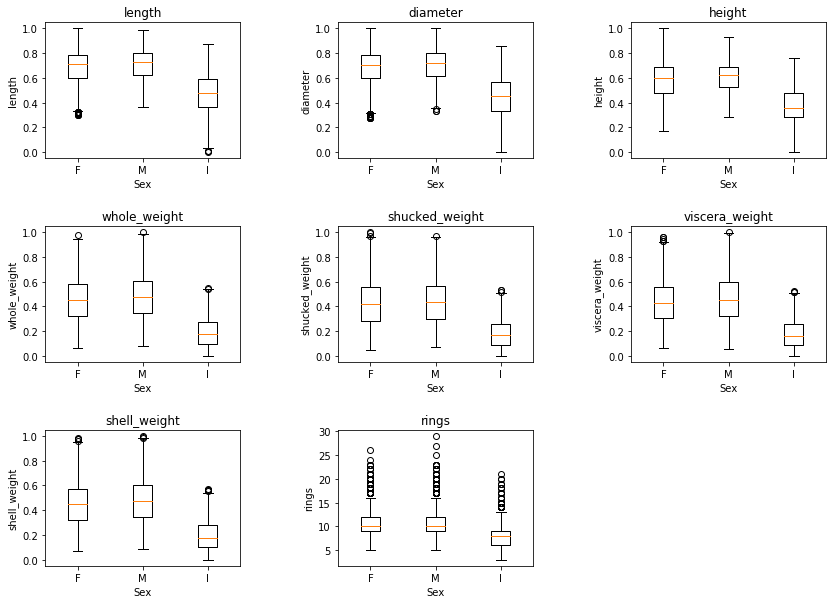

In [25]:
# plotting the distributions in form of boxplots one more time
fig2, ax2 = plt.subplots(nrows=3, ncols=3, figsize=(14,10))

for i in range(len(columns)):
    attributes = []
    for j in range(len(sex)):
        attributes.append(df_abalone_scaled.loc[df_abalone_scaled.sex==sex[j], columns[i]].values)
    if i < 3:
        ax2[0,i].boxplot([attributes[0], attributes[1], attributes[2]], labels=['F', 'M', 'I'])
        ax2[0,i].set_title(columns[i])
        ax2[0,i].set_xlabel('Sex')
        ax2[0,i].set_ylabel(columns[i])
    elif i < 6:
        ax2[1,i-3].boxplot([attributes[0], attributes[1], attributes[2]], labels=['F', 'M', 'I'])
        ax2[1,i-3].set_title(columns[i])
        ax2[1,i-3].set_xlabel('Sex')
        ax2[1,i-3].set_ylabel(columns[i])
    else:
        ax2[2,i-6].boxplot([attributes[0], attributes[1], attributes[2]], labels=['F', 'M', 'I'])
        ax2[2,i-6].set_title(columns[i])
        ax2[2,i-6].set_xlabel('Sex')
        ax2[2,i-6].set_ylabel(columns[i])

#     print(attributes[0])
ax2[2,2].remove()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

Based on this visualization, the infants can be clearly seperated from the adult abalone. Tasmanian male abalone seem to have slightly heavier body parts and dimensions even though the differences are not as obvious and need further confirmation in numbers. Height has the smallest range. In general, the variables appear to be slightly skewed, but relatively normal. The variable 'rings' is the most skewed: there are more younger femal and male abalone and older infant abalone. The medians seem to be closer together than in any of the other variables. This impression should be confirmed with histograms that include the mean and the median.

#### Plotting Distributions for Number of Rings, Length, and Weight (separated by Sex)

In the research status report by the New South Wales government, the features age, length and weight are mentioned 
to describe blacklip abalone. Blacklip abalone can get over 20 years old, grow up to a size of 22cm and can weigh 
more than 3 kg. Just as a reminder, age is estimated by the number of rings plus a constant of 1.5.

(0, 30)

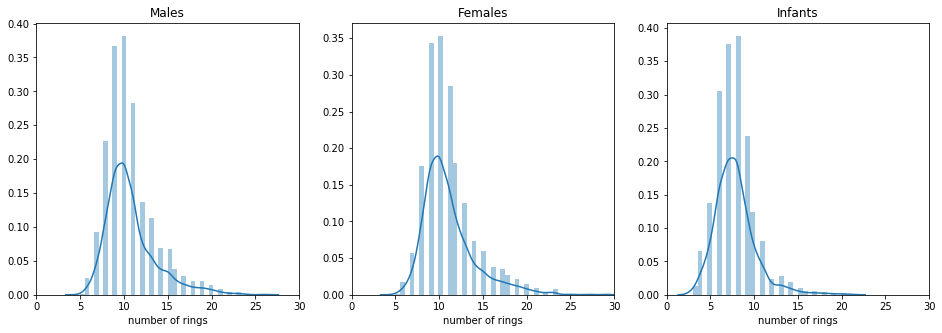

In [26]:
# plotting the distributions of 'number of rings'
fig2, ax2 = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
sns.distplot(df_abalone_cleaned[df_abalone_cleaned.sex == 'M'].rings, ax=ax2[0]).set_title("Males")
ax2[0].set_xlabel("number of rings")
ax2[0].set_xlim(0,30)
sns.distplot(df_abalone_cleaned[df_abalone_cleaned.sex == 'F'].rings, ax=ax2[1]).set_title("Females")
ax2[1].set_xlabel("number of rings")
ax2[1].set_xlim(0,30)
sns.distplot(df_abalone_cleaned[df_abalone_cleaned.sex == 'I'].rings, ax=ax2[2]).set_title("Infants")
ax2[2].set_xlabel("number of rings")
ax2[2].set_xlim(0,30)

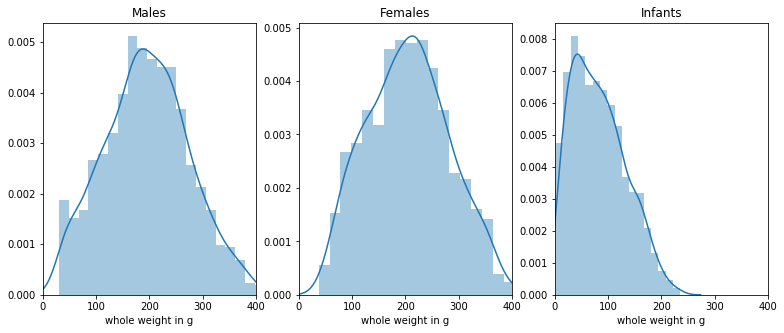

In [27]:
# plotting the distributions for whole_weight
fig2b, ax2b = plt.subplots(nrows=1, ncols=3, figsize=(13,5))
sns.distplot(nonnoramilzed[nonnoramilzed.sex == 'M'].whole_weight, ax=ax2b[0]).set_title("Males")
ax2b[0].set_xlabel("whole weight in g")
ax2b[0].set_xlim(0,400)
sns.distplot(nonnoramilzed[nonnoramilzed.sex == 'F'].whole_weight, ax=ax2b[1]).set_title("Females")
ax2b[1].set_xlabel("whole weight in g")
ax2b[1].set_xlim(0,400)
sns.distplot(nonnoramilzed[nonnoramilzed.sex == 'I'].whole_weight, ax=ax2b[2]).set_title("Infants")
ax2b[2].set_xlabel("whole weight in g")
ax2b[2].set_xlim(0,400);

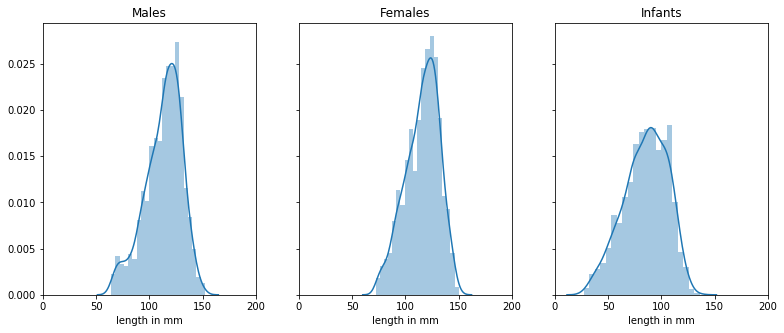

In [28]:
# plotting the distributions for length
fig2b, ax2b = plt.subplots(nrows=1, ncols=3, figsize=(13,5), sharey=True)
sns.distplot(nonnoramilzed[nonnoramilzed.sex == 'M'].length, ax=ax2b[0]).set_title("Males")
ax2b[0].set_xlabel("length in mm")
ax2b[0].set_xlim(0,200)
sns.distplot(nonnoramilzed[nonnoramilzed.sex == 'F'].length, ax=ax2b[1]).set_title("Females")
ax2b[1].set_xlabel("length in mm")
ax2b[1].set_xlim(0,200)
sns.distplot(nonnoramilzed[nonnoramilzed.sex == 'I'].length, ax=ax2b[2]).set_title("Infants")
ax2b[2].set_xlabel("length in mm")
ax2b[2].set_xlim(0,200);

Surprisingly, the distributions of the number of rings between adults and infants look very similar and have a relatively large overlap. The infant distribution appears to be just shifted to the left by a few points on the x-axis.
The distributions of the infant whole weight feature and the infant length shows a more expected difference, but has also a large overlap with the adult distributions.
According to a description of Blacklip Abalone (Haliotis rubra) in the Wild Fisheries Research Program Status Report from the New South Wales government in Australia, blacklip abalone mature at a length bentween 90mm and 100mm at an age between 3 to 6 years (keeping in mind that biological systems often show broad varioations). Let's compare expectations of the infant population based on the number of rings and the length with the assigned value 'infant' in the 'sex' feature.

In [29]:
# comparing numbers of assigned infant abalone with domain knowledge from NWS government about blacklip abalone
# blacklip abalone mature at a length between 90 and 100mm (9 and 10 cm)
df_length_larger90 = df_abalone_cleaned[df_abalone_cleaned.length > 90]
df_length_smaller90 = df_abalone_cleaned[df_abalone_cleaned.length <= 90]
length_larger90 = df_length_larger90.count().values[0]
length_smaller90 = df_length_smaller90.count().values[0]
print("There are {} entries with lenght smaller than 90mmm and {} entries are larger.".format(
                                                                            length_smaller90, length_larger90))

df_length_larger100 = df_abalone_cleaned[df_abalone_cleaned.length > 100]
df_length_smaller100 = df_abalone_cleaned[df_abalone_cleaned.length <= 100]
length_larger100 = df_length_larger100.count().values[0]
length_smaller100 = df_length_smaller100.count().values[0]
print("There are {} entries with lenght smaller than 100mmm and {} entries are larger.".format(
                                                                            length_smaller100, length_larger100))
print("")

# blacklip abalone mature at an age of 3-6 years, which equals 1.5-4.5 rings, for simplicity 4 is chosen
df_rings_more15 = df_abalone_cleaned[df_abalone_cleaned.rings > 1.5]
df_rings_less15 = df_abalone_cleaned[df_abalone_cleaned.rings <= 1.5]
rings_more15 = df_rings_more15.count().values[0]
rings_less15 = df_rings_less15.count().values[0]
print("There are {} entries have less rings than 1.5 and {} entries have more.".format(
                                                                            rings_less15, rings_more15))

df_rings_more45 = df_abalone_cleaned[df_abalone_cleaned.rings > 4.5]
df_rings_less45 = df_abalone_cleaned[df_abalone_cleaned.rings <= 4.5]
rings_more45 = df_rings_more45.count().values[0]
rings_less45 = df_rings_less45.count().values[0]
print("There are {} entries have less rings than 4.5 and {} entries have more.".format(
                                                                            rings_less45, rings_more45))
print("")

# total numbers of infants
df_assigned_infants = df_abalone_cleaned[df_abalone_cleaned.sex == "I"]
indices_infants_90_15 = list(df_rings_less15.index) + list(df_length_smaller90.index)
indices_infants_100_45 = list(df_rings_less45.index) + list(df_length_smaller100.index)
unique_indices_infants_90_15 = set(indices_infants_90_15)
unique_indices_infants_100_45 = set(indices_infants_100_45)
print("Number of abalone smaller than or equal to 90mm and younger than or equal to 3 years: ", len(unique_indices_infants_90_15))
print("Number of abalone smaller than or equal to 100mm and younger than or equal to 6 years: ", len(unique_indices_infants_100_45))
print("Number of assigned infants in the dataset: ", df_assigned_infants.count().values[0])

# check if all abalone length <= 90 mm and number of rings <= 4.5 are the same data points as the assigned infants
# print(df_assigned_infants['Unnamed: 0'].values)
not_assigned_indices = []
for index_measure in sorted(unique_indices_infants_90_15):
    if index_measure not in df_assigned_infants.index.values:
        not_assigned_indices.append(index_measure)
print("There are {} from the {} found animals that have length <= 90mm and age <= 3 that not assigned as infant.".format(
                        len(set(not_assigned_indices)), len(unique_indices_infants_90_15)))
# print(sorted(set(not_assigned_indices)))
# print(df_abalone_cleaned.iloc[1])
# df_abalone_cleaned.head()

There are 986 entries with lenght smaller than 90mmm and 2977 entries are larger.
There are 1508 entries with lenght smaller than 100mmm and 2455 entries are larger.

There are 0 entries have less rings than 1.5 and 3963 entries have more.
There are 55 entries have less rings than 4.5 and 3908 entries have more.

Number of abalone smaller than or equal to 90mm and younger than or equal to 3 years:  986
Number of abalone smaller than or equal to 100mm and younger than or equal to 6 years:  1508
Number of assigned infants in the dataset:  1290
There are 250 from the 986 found animals that have length <= 90mm and age <= 3 that not assigned as infant.


Due to this large discrepancy of 250 data points, for which I have not enough domain knowledge to reason about, the main analysis will be conducted on the adult data first. Eventually, the infants will be added back in.

#### Correlation Analysis

A scatterplot matrix can help to identify potential associations.

In [30]:
# find pairwise correlation of all numeric features using Pearson's standard correlation coefficient.
df_abalone_scaled.corr()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1.000,0.985,0.893,0.934,0.909,0.906,0.911,0.529
diameter,0.985,1.000,0.900,0.934,0.904,0.902,0.919,0.549
height,0.893,0.900,1.000,0.890,0.840,0.867,0.896,0.587
whole_weight,0.934,0.934,0.890,1.000,0.970,0.965,0.958,0.520
shucked_weight,0.909,0.904,0.840,0.970,1.000,0.929,0.889,0.399
viscera_weight,0.906,0.902,0.867,0.965,0.929,1.000,0.913,0.483
shell_weight,0.911,0.919,0.896,0.958,0.889,0.913,1.000,0.608
rings,0.529,0.549,0.587,0.520,0.399,0.483,0.608,1.000


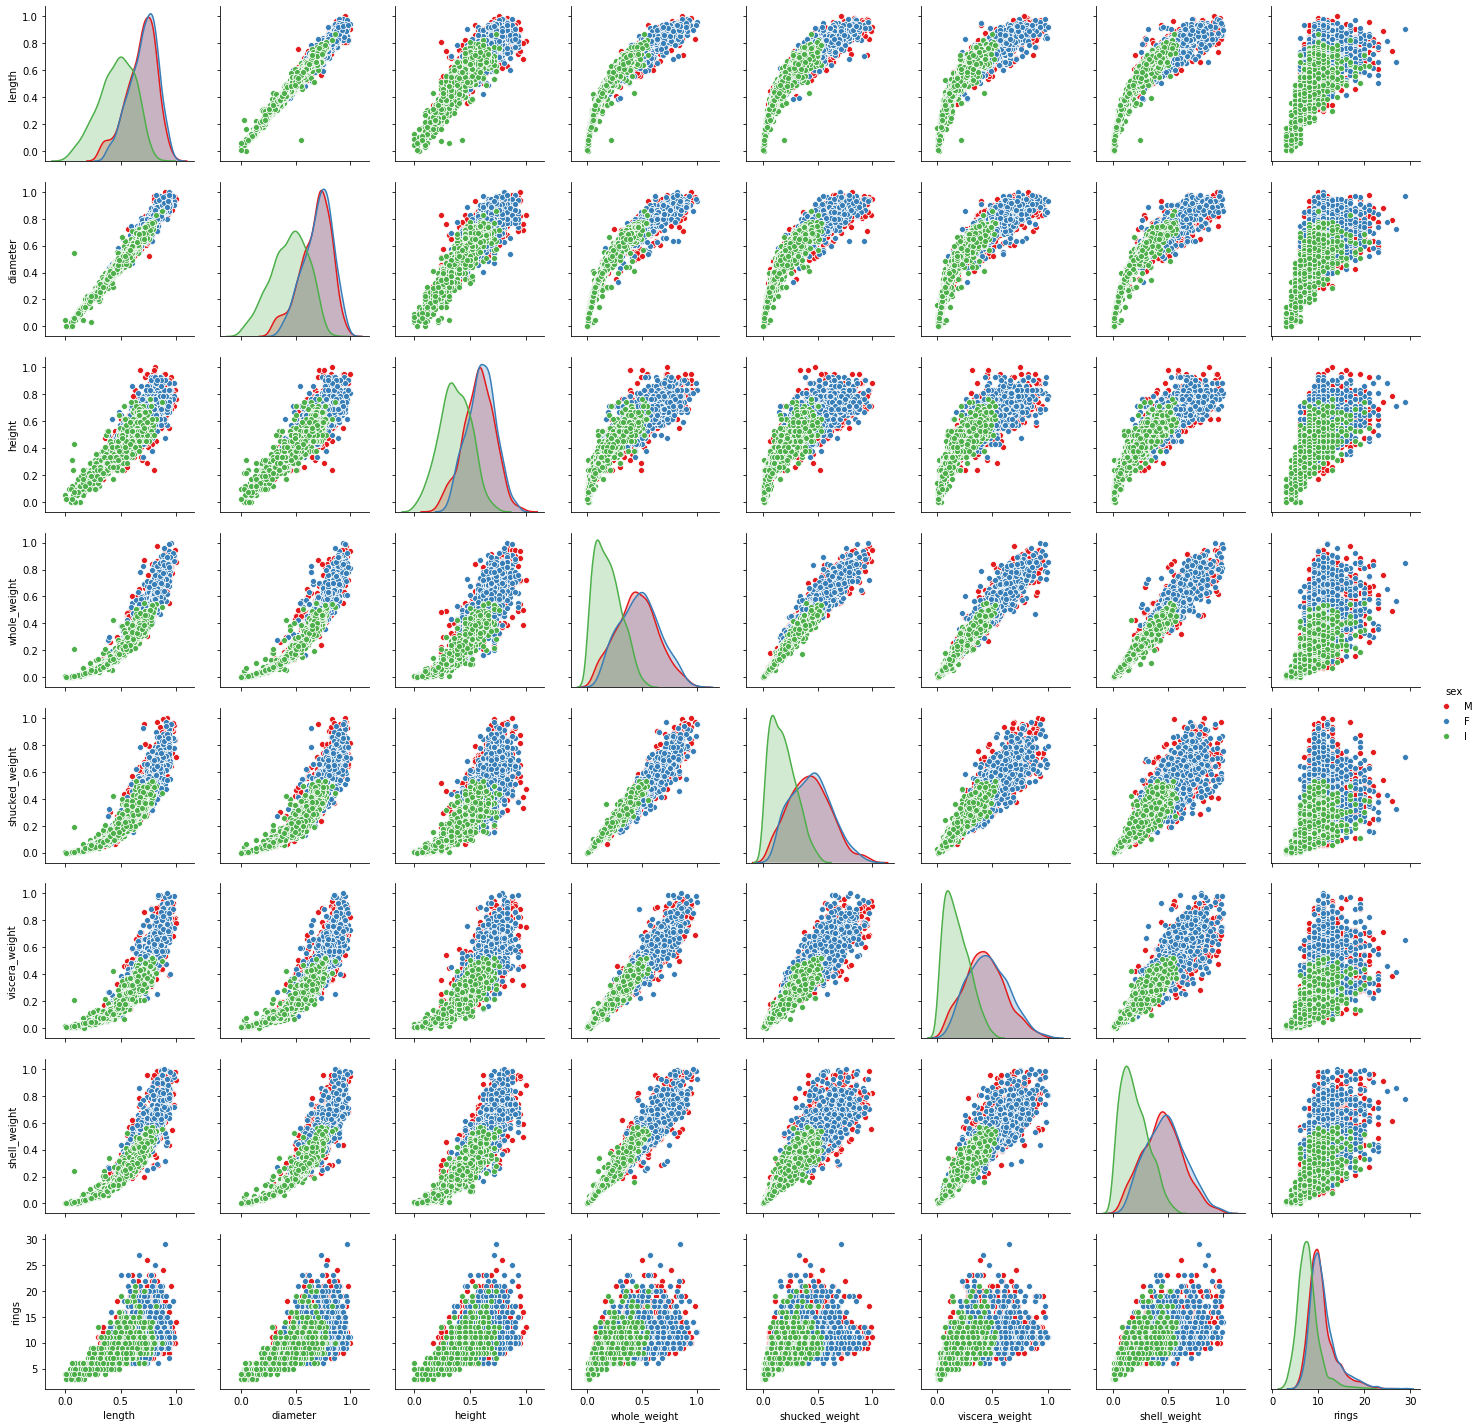

In [31]:
sns.pairplot(df_abalone_scaled, hue='sex', kind="scatter", palette="Set1");

As expected, there are strong positive correlations between all body measurements. There seem to be linear as well as polynomial correlations between attributes. Logically, the features 'lenght', 'height', and 'diameter' are probably colinear with a regression coefficient of 0.985 as well as the the weight features 'whole_weight', 'shucked_weight', 'viscera_weight', and 'shell_weight' with a correlation coefficient of at least 0.889. However, the smallest correlation coefficient between attributes is 0.867, which is very high. The outer shell measurements, such as diameter, length, and height determine the potential volume inside the shell, which limits the space for meat and organs. Therefore, outer shell measurements and weight measurements are probably highly correlated by shell volume (which is unfortunately not a feature in the data set). The 'number of rings' shows the lowest correlation between 0.399 and 0.608.

In [32]:
# find pairwise correlation of all numeric features using Pearson's standard correlation coefficient.
df_abalone_scaled.corr()["rings"]

length           0.529
diameter         0.549
height           0.587
whole_weight     0.520
shucked_weight   0.399
viscera_weight   0.483
shell_weight     0.608
rings            1.000
Name: rings, dtype: float64

The most important features for the main analysis probably are 'height' and 'shell_weight' according to the 
correlation coefficients of 0.587 and 0.608 respectively.

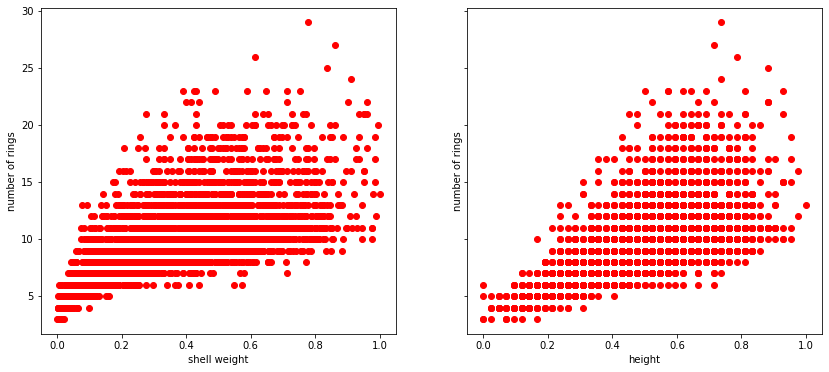

In [33]:
# plotting the factors with the strongest correlation factors - shell-weight, height - with rings
fig3, ax3 = plt.subplots(nrows=1, ncols=2, figsize=(14,6), sharey=True)
ax3[0].plot(df_abalone_scaled['shell_weight'], df_abalone_scaled.rings, 'ro')
ax3[0].set_xlabel('shell weight')
ax3[0].set_ylabel('number of rings')
ax3[1].plot(df_abalone_scaled['height'], df_abalone_scaled.rings, 'ro')
ax3[1].set_xlabel('height')
ax3[1].set_ylabel('number of rings');

#### Conclusions from EDA
There exist high colinearities or probably strong polynomial relationships between all predictor variables. The most important features with the strongest correlation to the number of rings have been identified as 'height' and 'shell_weight'. Due to a missmatch in 250 infant data points with researched domain knowledgeDue to this large discrepancy of 250 data points, for which I have not enough domain knowledge to reason about, the main analysis will be conducted on the adult data first. Eventually, the infants will be added back in.

### Simple Linear Regression Model

#### Fitting the data

In [34]:
model_shellWeight = smf.ols(formula='rings~shell_weight', data=df_abalone_scaled).fit()
model_shellWeight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  rings   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     2326.
Date:                Sat, 14 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:12:21   Log-Likelihood:                -9239.3
No. Observations:                3963   AIC:                         1.848e+04
Df Residuals:                    3961   BIC:                         1.850e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.4374      0.082     78.399      0.000       6.276       6.598
shell_weight     9.1660      0.190     48.227      0.000       8.793       9.539
==============================================================================
Omnibus:                     1193.008   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3622.812
Skew:                           1.549   Prob(JB):                         0.00
Kurtosis:                       6.513   Cond. No.                         5.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model_height = smf.ols(formula='rings~height', data=df_abalone_scaled).fit()
model_height.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  rings   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     2079.
Date:                Sat, 14 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:12:21   Log-Likelihood:                -9318.6
No. Observations:                3963   AIC:                         1.864e+04
Df Residuals:                    3961   BIC:                         1.865e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3477      0.128     33.851      0.000       4.096       4.599
height        10.7256      0.235     45.597      0.000      10.264      11.187
==============================================================================
Omnibus:                     1243.365   Durbin-Watson:                   1.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3953.482
Skew:                           1.598   Prob(JB):                         0.00
Kurtosis:                       6.705   Cond. No.                         7.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both models, model_shellWeight and model_height, show a small R-squared value which indicates a bad fit of the regression line between the predictors shell_weight or height and the response 'number of rings'. Let's plot them and take a look.

#### Plotting the Regression Lines

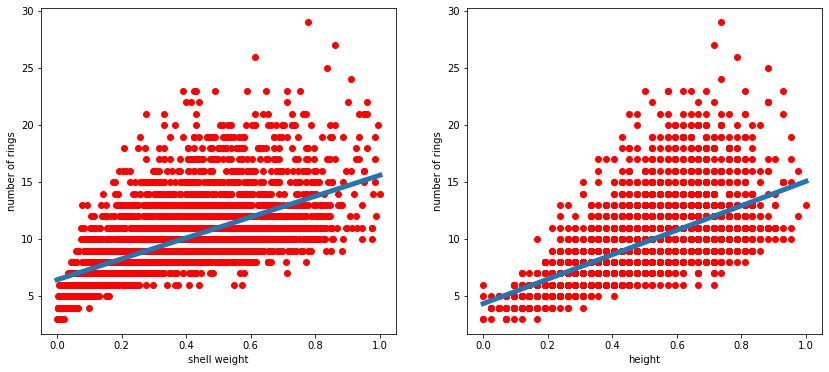

In [36]:
beta0_shellWeight, beta1_shellWeight = model_shellWeight.params
beta0_height, beta1_height = model_height.params

fig4, ax4 = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax4[0].plot(df_abalone_scaled.shell_weight, df_abalone_scaled.rings, 'ro');
xticks = np.linspace(0,1,10)
ax4[0].plot(xticks, beta0_shellWeight + beta1_shellWeight * xticks, lw=5)
ax4[0].set_xlabel('shell weight')
ax4[0].set_ylabel('number of rings');
ax4[1].plot(df_abalone_scaled.height, df_abalone_scaled.rings, 'ro');
# xticks = np.linspace(0,210,10)
ax4[1].plot(xticks, beta0_height + beta1_height * xticks, lw=5)
ax4[1].set_xlabel('height')
ax4[1].set_ylabel('number of rings');

The plots confirm the bad fit of the regression lines to the data.

#### Plotting the Residuals

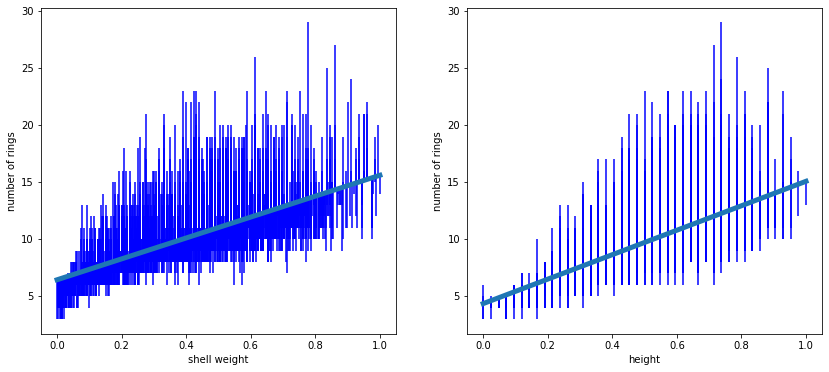

In [37]:
fig5, ax5 = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
yhat_shellWeight = beta0_shellWeight + beta1_shellWeight*df_abalone_scaled.shell_weight
yhat_height = beta0_height + beta1_height * df_abalone_scaled.height

ax5[0].vlines(df_abalone_scaled.shell_weight, ymin=yhat_shellWeight, ymax=df_abalone_scaled.rings, color='blue')
xticks = np.linspace(0,1,10)
ax5[0].plot(xticks, beta0_shellWeight + beta1_shellWeight * xticks, lw=5)
ax5[0].set_xlabel('shell weight')
ax5[0].set_ylabel('number of rings');

ax5[1].vlines(df_abalone_scaled.height, ymin=yhat_height, ymax=df_abalone_scaled.rings, color='blue')
ax5[1].plot(xticks, beta0_height + beta1_height * xticks, lw=5)
ax5[1].set_xlabel('height')
ax5[1].set_ylabel('number of rings');

The residuals are at some areas along the line very large. The RSS must be large.

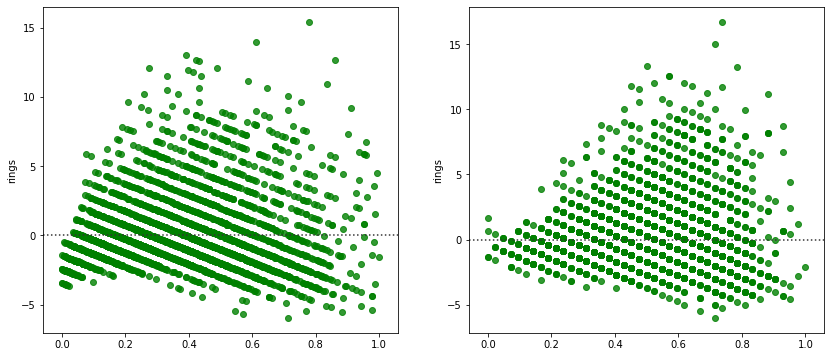

In [38]:
fig6, ax6 = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax6[0].set(ylabel = "")
ax6[1].set(ylabel = "")
sns.residplot(df_abalone_scaled.shell_weight.values, df_abalone_scaled.rings, color='g', ax=ax6[0])
sns.residplot(df_abalone_scaled.height.values, df_abalone_scaled.rings, color='g', ax=ax6[1]);

Furthermore, the residual plots show clearly a pattern and not random scatter.

In [39]:
#### Calculating the RSS

In [40]:
residuals_shellWeight = df_abalone_scaled.rings - yhat_shellWeight
RSS_shellWeight = np.sum(residuals_shellWeight ** 2)
residuals_height = df_abalone_scaled.rings - yhat_height
RSS_height = np.sum(residuals_height ** 2)
print('RSS for predictor shell_weight is ', RSS_shellWeight)
print('RSS for predictor height is ', RSS_height)

RSS for predictor shell_weight is  24579.162652944702
RSS for predictor height is  25583.2834360577


The RSS values seem to be relatively small. However, the data is scaled between 0 and 1, 
so that a value of greater than 33 is quite large.

#### Calculating a 95% Confidence Interval for each Model

In [41]:
print("Shell weight: beta0 = {}, beta1 = {}".format(beta0_shellWeight, beta1_shellWeight))
print(model_shellWeight.conf_int(0.05))
print("")
print("Height: beta0 = {}, beta1 = {}".format(beta0_height, beta1_height))
print(model_height.conf_int(0.05))

Shell weight: beta0 = 6.437362133819036, beta1 = 9.165960020030775
                 0     1
Intercept    6.276 6.598
shell_weight 8.793 9.539

Height: beta0 = 4.347677736158568, beta1 = 10.725591788204593
               0      1
Intercept  4.096  4.599
height    10.264 11.187


The parameters beta0 and beta1 are for both predictors within the confidence interval. 
That means that the bad fit of the linear regression models is not caused by bad parameter estimates. 
Single linear regression is not the right model for this analysis.

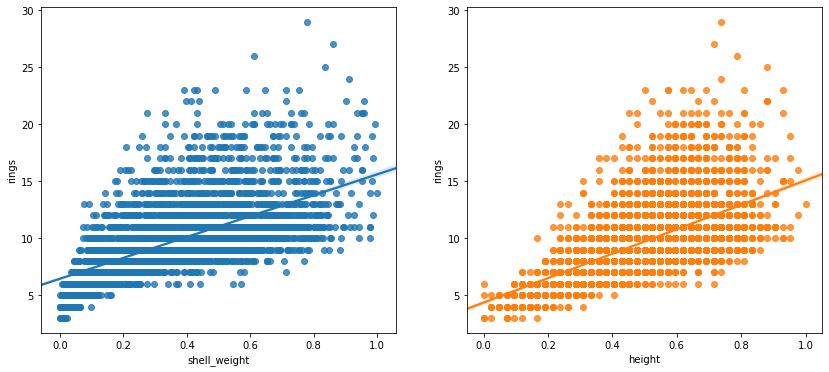

In [42]:
fig7, ax7 = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.regplot(x='shell_weight', y = 'rings', data=df_abalone_scaled, ci=95, ax=ax7[0])
sns.regplot(x='height', y = 'rings', data=df_abalone_scaled, ci=95, ax=ax7[1])